In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import time

In [3]:
import sys
sys.path.append("../code")
import model_agegroups
import plotting
import plotting_agegroups
import parameters_agegroups

Correlation: 0.5999018910962539


In [4]:
params_m1 = parameters_agegroups.get_params(scen=1)
params_m2 = parameters_agegroups.get_params(scen=2)
params_m3 = parameters_agegroups.get_params(scen=3)
params_m4 = parameters_agegroups.get_params(scen=4)
params_m5 = parameters_agegroups.get_params(scen=5)
params_mfull = parameters_agegroups.get_params(scen=1)
params_mfull.update({'feedback_off': True,
                     'alpha_w':0,
                     'alpha_u':0
                    })

In [5]:
m1 = model_agegroups.Model(**params_m1)
m2 = model_agegroups.Model(**params_m2)
m3 = model_agegroups.Model(**params_m3)
m4 = model_agegroups.Model(**params_m4)
m5 = model_agegroups.Model(**params_m5)
mfull = model_agegroups.Model(**params_mfull)

In [6]:
start_time = time.time()
times, data = m1.run()
print(time.time() - start_time)
times, data = m2.run()
print(time.time() - start_time)
times, data = m3.run()
print(time.time() - start_time)
times, data = m4.run()
print(time.time() - start_time)
times, data = m5.run()
print(time.time() - start_time)
times, data = mfull.run()

26.226474285125732
57.57749557495117
91.97674679756165
126.62299084663391
169.85432982444763


In [7]:
[(m.chopped_data() < 0 ).any() for m in [m1,m2,m3,m4,m5,mfull]]

[False, False, False, False, False, False]

In [8]:
m1.save("./pickle/m1_22_11.pickle")
m2.save("./pickle/m2_22_11.pickle")
m3.save("./pickle/m3_22_11.pickle")
m4.save("./pickle/m4_22_11.pickle")
m5.save("./pickle/m5_22_11.pickle")
mfull.save("./pickle/mfull_22_11.pickle")

In [9]:
m1 = model_agegroups.Model.load("./pickle/m1_22_11.pickle")
m2 = model_agegroups.Model.load("./pickle/m2_22_11.pickle")
m3 = model_agegroups.Model.load("./pickle/m3_22_11.pickle")
m4 = model_agegroups.Model.load("./pickle/m4_22_11.pickle")
m5 = model_agegroups.Model.load("./pickle/m5_22_11.pickle")
mfull = model_agegroups.Model.load("./pickle/mfull_22_11.pickle")

In [10]:
print('Possible plotting arguments:\n')
print('NPI', 'Rt_OBS', 'Rt_EV', 'Incidence', 'ICU', 'Vaccines', 'Immunity', 'Deaths', 'Cosmo', 'Romania', 'Patients')


Possible plotting arguments:

NPI Rt_OBS Rt_EV Incidence ICU Vaccines Immunity Deaths Cosmo Romania Patients


In [10]:
figure2 = {
    'type': 'scenarios',
    'ax1': 'NPI',
    'ax2': 'Incidence',
    'ax3': 'ICU',
    'ax4': 'Vaccines',
    'ax5': 'Immunity',
    'ax6': 'Deaths',
    'c1': '#1B1919FF',
    'c2': '#00468BFF',
    'c3': '#0099B4FF',
    'Scens': [1,3,5]
}

figure3 = {
    'type': 'scenarios',
    'ax1': 'NPI',
    'ax2': 'Incidence',
    'ax3': 'ICU',
    'ax4': 'Vaccines',
    'ax5': 'Immunity',
    'ax6': 'Deaths',
    'c1': '#1B1919FF',
    'c2': '#00468BFF',
    'c3': '#0099B4FF',
    'Scens': [2,3,4]
}



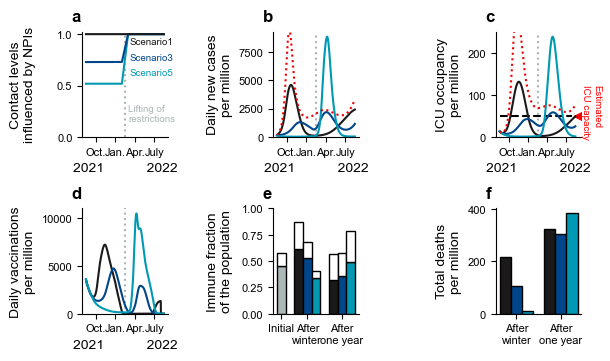

In [11]:
import importlib
importlib.reload(plotting_agegroups)
plotting_agegroups.sixpanels_flexible([m1,m3,m5], figure2, "./figures/extended/fig2.pdf", arial=True, ICUcap=50, full_wave=mfull)
#, full_wave=mfull

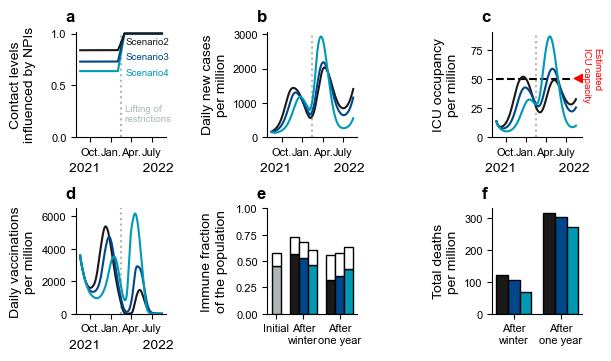

In [12]:
import importlib
importlib.reload(plotting_agegroups)
plotting_agegroups.sixpanels_flexible([m2,m3,m4], figure3, "./figures/extended/fig3.pdf", arial=True, ICUcap=50)
#, full_wave=mfull

In [4]:
#CosmoStringency, CosmoICU, CosmovsICU, KernelR, KernelV, Romania, Willingness

motivation = {
    'ax1': 'CosmoICU',
    'ax2': 'CosmovsICU',
    'ax3': 'Romania',
    'ax4': 'Willingness',

    'cICU': '#00468BFF',
    'cStringency': 'orange',
    'cCosmodata': 'red',
    'cVaccines': '#0099B4FF',
    'cFit': 'black'
}



Linear correlation: 0.6996061003210294
Linear correlation: 0.7647960362312393
Parameters: [0.83752604 0.0053294 ]
One standard deviation: [0.01835087 0.00094654]
Relative error: [0.02191081 0.17760685]


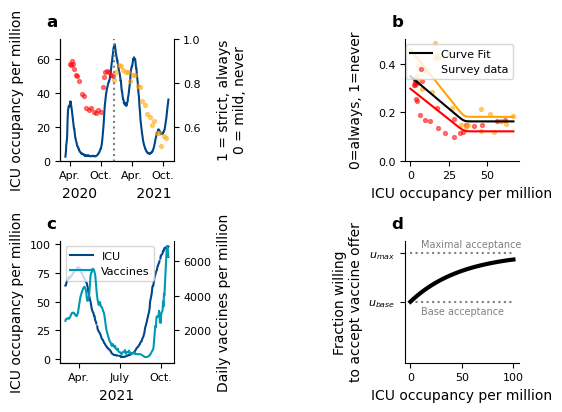

In [15]:
import importlib
importlib.reload(plotting_agegroups)
plotting_agegroups.motivation(motivation, "./figures/extended/motivation.pdf", arial=False)

In [ ]:
motivation2 = {
    'ax1': 'CosmoStringency',
    'ax2': 'Matrix',
    'ax3': 'Reduction',
    'cStringency': '#1B1919FF',
    'cCosmodata': 'red',
    'cFit': 'black',
    'c1': '#1B1919FF',
    'c2': '#00468BFF',
    'c3': '#0099B4FF',
}

In [ ]:
import sys
sys.path.append("../code")
import cosmodata

print(cosmodata.datesdict['2021-01-01'])
cosmodata.cosmotimeline[:24]

In [ ]:
import importlib
importlib.reload(plotting_agegroups)
plotting_agegroups.motivation2(motivation2, "./figures/extended/motivation2.pdf", arial=False)

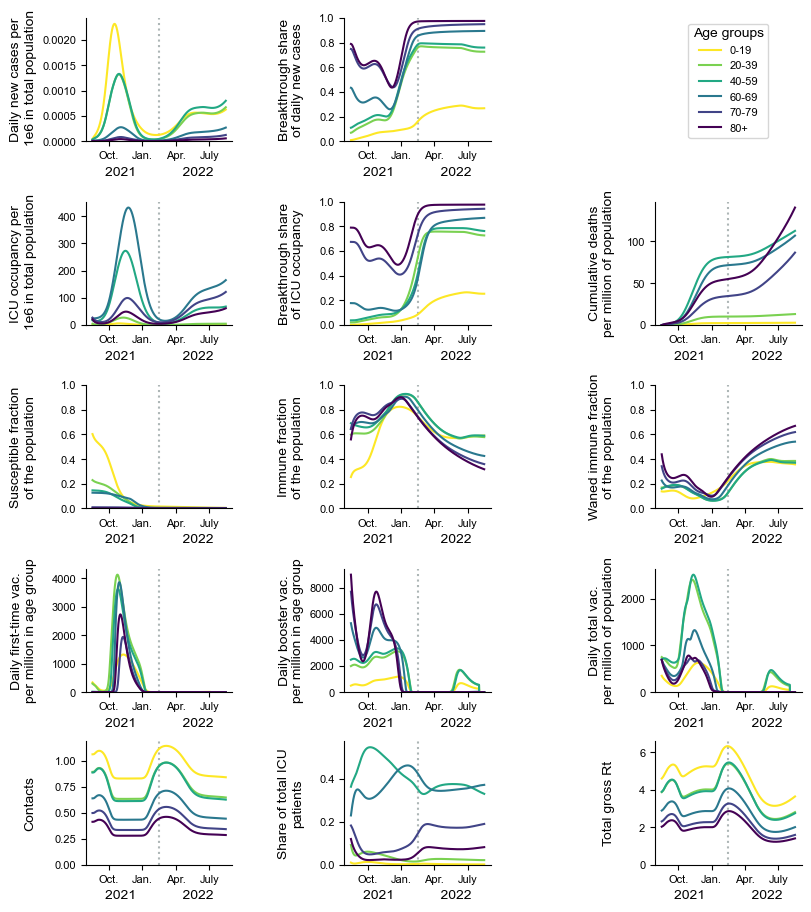

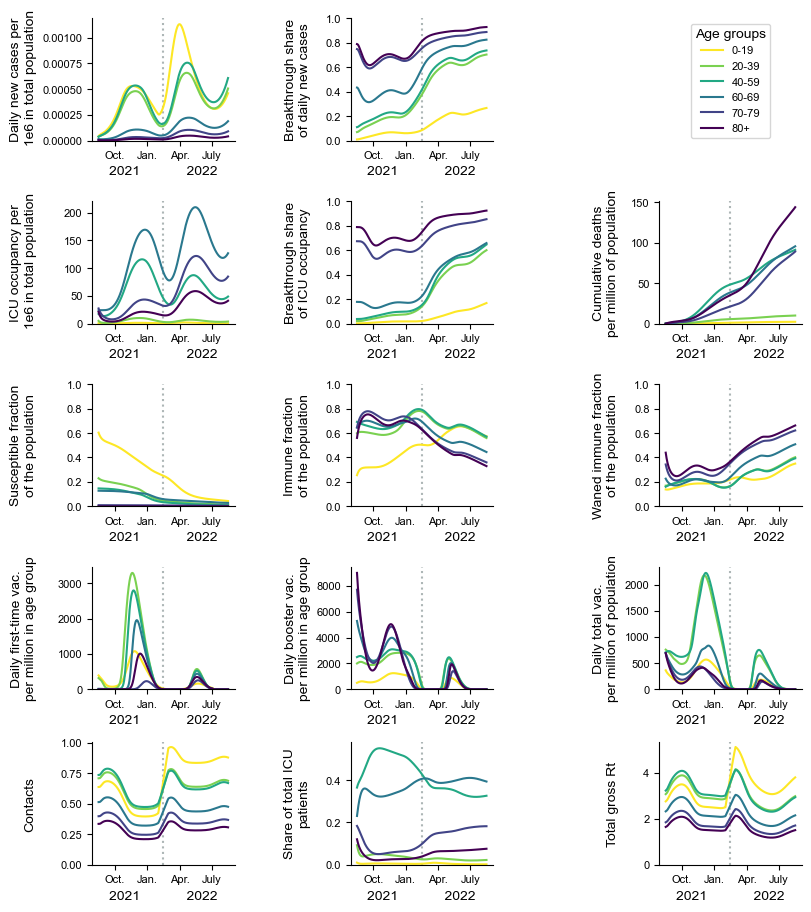

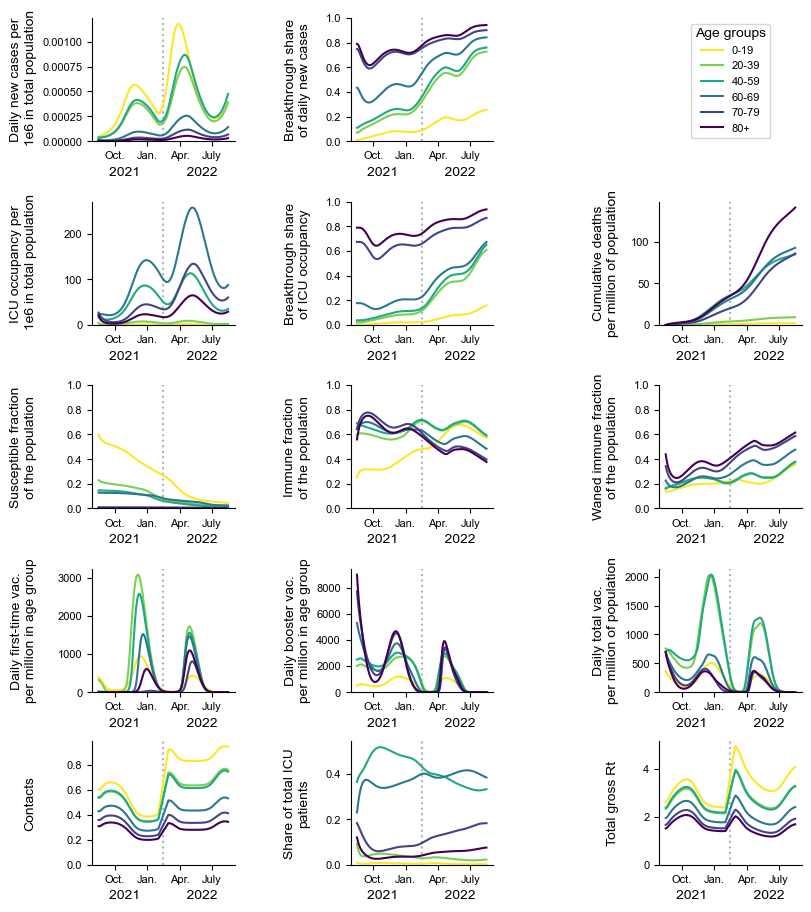

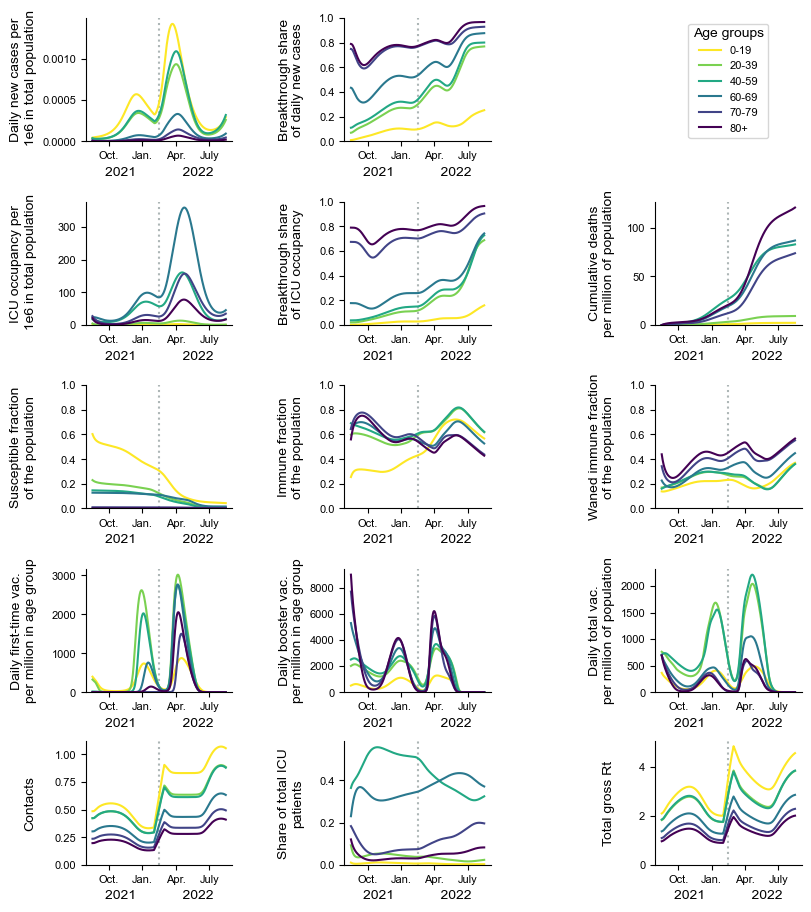

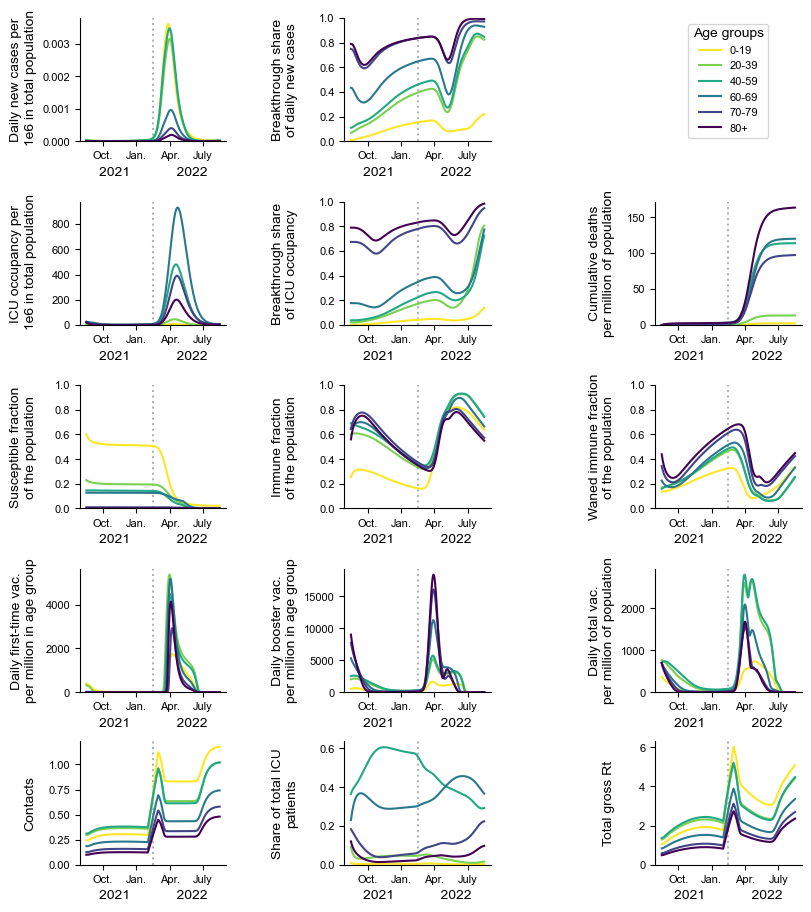

In [12]:
importlib.reload(plotting_agegroups)
plotting_agegroups.overview_agegroups(m1, path='./figures/AG_scen1.pdf', arial=True, silent=False)
plotting_agegroups.overview_agegroups(m2, path='./figures/AG_scen2.pdf', arial=True, silent=False)
plotting_agegroups.overview_agegroups(m3, path='./figures/AG_scen3.pdf', arial=True, silent=False)
plotting_agegroups.overview_agegroups(m4, path='./figures/AG_scen4.pdf', arial=True, silent=False)
plotting_agegroups.overview_agegroups(m5, path='./figures/AG_scen5.pdf', arial=True, silent=False)

In [ ]:
params_deu = parameters_agegroups.get_params(scen=3, inspiration='Germany')
params_dsk = parameters_agegroups.get_params(scen=3, inspiration='Denmark')
params_por = parameters_agegroups.get_params(scen=3, inspiration='Portugal')
params_pol = parameters_agegroups.get_params(scen=3, inspiration='Poland')
params_aus = parameters_agegroups.get_params(scen=3, inspiration='Austria')

params_por

In [ ]:
m_deu = model_agegroups.Model(**params_deu)
m_dsk = model_agegroups.Model(**params_dsk)
m_por = model_agegroups.Model(**params_por)
m_pol = model_agegroups.Model(**params_pol)
m_aus = model_agegroups.Model(**params_aus)

In [ ]:
start_time = time.time()
times, data = m_deu.run()
print(time.time() - start_time)
times, data = m_dsk.run()
print(time.time() - start_time)
times, data = m_por.run()
print(time.time() - start_time)
times, data = m_pol.run()
print(time.time() - start_time)
times, data = m_aus.run()
print(time.time() - start_time)

In [ ]:
[(m.chopped_data() < 0 ).any() for m in [m_deu,m_dsk,m_por,m_pol,m_aus]]

In [ ]:
m_deu.save("./pickle/deu_12_11.pickle")
m_dsk.save("./pickle/dsk_12_11.pickle")
m_por.save("./pickle/por_12_11.pickle")
m_pol.save("./pickle/pol_12_11.pickle")
m_aus.save("./pickle/aus_12_11.pickle")

In [ ]:
m_deu = model_agegroups.Model.load("./pickle/deu_12_11.pickle")
m_dsk = model_agegroups.Model.load("./pickle/dsk_12_11.pickle")
m_por = model_agegroups.Model.load("./pickle/por_12_11.pickle")
m_pol = model_agegroups.Model.load("./pickle/pol_12_11.pickle")
m_aus = model_agegroups.Model.load("./pickle/aus_12_11.pickle")

In [ ]:
countryfigure = {
    'type': 'countries',
    'ax1': 'NPI',
    'ax2': 'Incidence',
    'ax3': 'ICU',
    'ax4': 'Vaccines',
    'ax5': 'Immunity',
    'ax6': 'Deaths',
    'c1': '#1B1919FF',
    'c1': 'pink',
    'c2': '#00468BFF',
    'c3': '#0099B4FF',
    'Scens': ['Poland', 'Germany', 'Portugal']
}


In [ ]:
import importlib
importlib.reload(plotting_agegroups)
plotting_agegroups.sixpanels_flexible([m_pol, m_deu, m_por], countryfigure, "./figures/countries.pdf", arial=True, ICUcap=60)

In [ ]:
importlib.reload(plotting_agegroups)
plotting_agegroups.overview_agegroups(m_deu, path='./figures/AG_DEU.pdf', arial=True, silent=False)
plotting_agegroups.overview_agegroups(m_dsk, path='./figures/AG_DSK.pdf', arial=True, silent=False)
plotting_agegroups.overview_agegroups(m_pol, path='./figures/AG_POL.pdf', arial=True, silent=False)
plotting_agegroups.overview_agegroups(m_por, path='./figures/AG_POR.pdf', arial=True, silent=False)
plotting_agegroups.overview_agegroups(m_aus, path='./figures/AG_AUS.pdf', arial=True, silent=False)